In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orange-quality/Orange Quality Data.csv


# LOADING DATA

In [2]:
df=pd.read_csv('/kaggle/input/orange-quality/Orange Quality Data.csv')
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [3]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [4]:
df['Color'].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [5]:
df['Variety'].value_counts()

Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64

In [6]:
df['Blemishes (Y/N)'].value_counts()

Blemishes (Y/N)
N                          149
Y (Sunburn Patch)           23
Y (Scars)                   17
Y (Minor)                   14
Y (Mold Spot)               10
Y (Bruising)                 9
Y (Split Skin)               8
Y (Minor Insect Damage)      6
Y (Sunburn)                  2
Y (Bruise)                   1
N (Minor)                    1
N (Split Skin)               1
Name: count, dtype: int64

# EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

## **Correlation Analysis**

In [8]:
numerical_features = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']

In [9]:
# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

In [10]:
# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                    Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  \
Size (cm)            1.000000    0.305348         -0.305865      0.330487   
Weight (g)           0.305348    1.000000         -0.239659      0.303806   
Brix (Sweetness)    -0.305865   -0.239659          1.000000     -0.300080   
pH (Acidity)         0.330487    0.303806         -0.300080      1.000000   
Softness (1-5)       0.236863    0.316806         -0.344376      0.360222   
HarvestTime (days)   0.313330    0.374670         -0.329862      0.262461   
Ripeness (1-5)      -0.256665   -0.260454          0.144666     -0.232627   
Quality (1-5)       -0.243113   -0.330268          0.631343     -0.321942   

                    Softness (1-5)  HarvestTime (days)  Ripeness (1-5)  \
Size (cm)                 0.236863            0.313330       -0.256665   
Weight (g)                0.316806            0.374670       -0.260454   
Brix (Sweetness)         -0.344376           -0.329862        0.

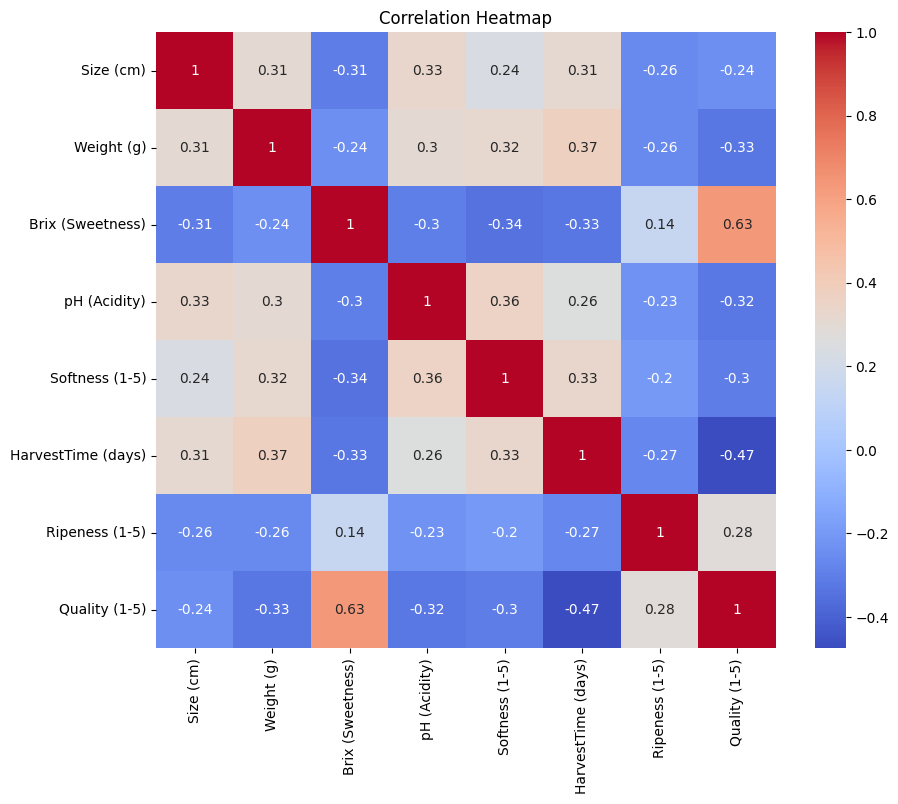

In [11]:
# Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix, here are some key observations and insights:

* **Size and Weight:** The correlation between Size and Weight is positive (0.305348), indicating that larger oranges tend to weigh more, which is expected.

* **Brix (Sweetness) and Quality:** There is a relatively strong positive correlation (0.631343) between Brix (Sweetness) and Quality rating. This suggests that sweeter oranges are generally rated as having higher quality.

* **pH (Acidity) and Quality:** There is a moderate negative correlation (-0.321942) between pH (Acidity) and Quality rating. This implies that oranges with lower acidity levels (higher pH) tend to have higher quality ratings.

* **HarvestTime and Quality:** There is a moderate negative correlation (-0.474754) between HarvestTime (days since harvest) and Quality rating. This indicates that oranges harvested more recently tend to have higher quality ratings, which is expected as they are likely fresher.

* **Ripeness and Quality:** There is a positive correlation (0.280764) between Ripeness rating and Quality rating, suggesting that riper oranges tend to have higher quality ratings.

* **Softness and Quality:** There is a moderate negative correlation (-0.302732) between Softness rating and Quality rating. This could imply that softer oranges (higher Softness rating) are perceived as having lower quality.

* **Brix vs. Acidity:** There is a moderate negative correlation (-0.300080) between Brix (Sweetness) and pH (Acidity), which means that sweeter oranges tend to have lower acidity levels.

* **Size vs. Sweetness and Acidity:** There is a weak negative correlation between Size and Brix (-0.305865), and a weak positive correlation between Size and pH (0.330487). This suggests that larger oranges tend to be slightly less sweet and have slightly higher acidity levels.

## **Variety Comparison**

In [12]:
# Get the top 5 varieties based on their frequency
top_varieties = df['Variety'].value_counts().head(5).index.tolist()

In [13]:
# Filter the data to include only the top 5 varieties
top_data = df[df['Variety'].isin(top_varieties)]

In [14]:
# Group the data by 'Variety' and calculate the mean/median for each group
variety_stats = top_data.groupby('Variety')[['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']].agg(['mean', 'median'])

In [15]:
# Print the mean/median values for each feature and variety
print("Mean/Median Values by Variety:")
print(variety_stats)

Mean/Median Values by Variety:
             Brix (Sweetness)        pH (Acidity)        Softness (1-5)  \
                         mean median         mean median           mean   
Variety                                                                   
Cara Cara            9.371429   8.50     3.755714   3.97       4.023810   
Moro (Blood)         9.943750   8.25     3.891250   3.90       3.781250   
Navel               10.712500  11.05     3.568125   3.54       2.625000   
Star Ruby           10.322222  10.75     3.338889   3.20       3.388889   
Temple              11.016667  11.15     3.390556   3.20       3.083333   

                    Ripeness (1-5)        Quality (1-5)         
             median           mean median          mean median  
Variety                                                         
Cara Cara      4.50       3.357143   3.00      3.190476    3.0  
Moro (Blood)   4.25       2.593750   2.50      3.531250    3.5  
Navel          3.00       3.968750   4.25  

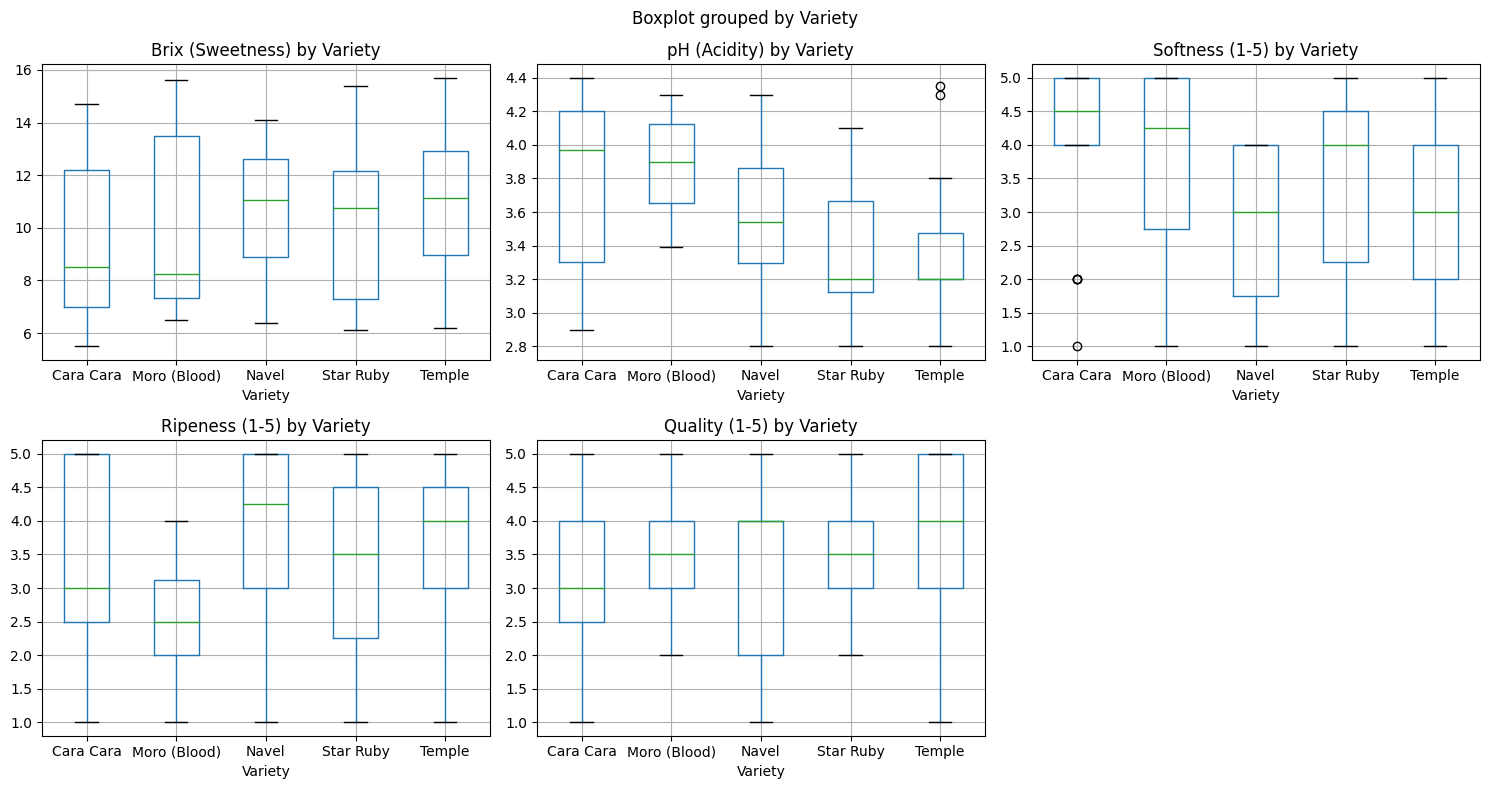

In [16]:
# Create box plots to visualize the distribution of each feature across varieties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']):
    top_data.boxplot(column=feature, by='Variety', ax=axes[i])
    axes[i].set_title(f'{feature} by Variety')

# Remove the empty subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

**Here are some potential insights:**

1) **Brix (Sweetness):**
* The 'Temple' variety has the highest mean Brix (11.02), suggesting it is the sweetest among the top varieties.

* The 'Navel' variety also has a relatively high mean Brix of 10.71.

* The 'Cara Cara' variety has the lowest mean Brix (9.37) among the top 5 varieties, indicating it may be less sweet on average.

2) **pH (Acidity):**
* The 'Moro (Blood)' variety has the highest mean pH (3.89), suggesting it may have slightly lower acidity levels compared to other varieties.

* The 'Star Ruby' variety has the lowest mean pH (3.34), indicating it may be more acidic on average.

3) **Softness (1-5):**
* The 'Cara Cara' variety has the highest mean Softness rating (4.02), suggesting it may be perceived as softer compared to other varieties.

* The 'Navel' variety has the lowest mean Softness rating (2.63), indicating it may be perceived as firmer on average.

4) **Ripeness (1-5):**
* The 'Cara Cara' variety has the highest mean Ripeness rating (3.36), suggesting it may be perceived as riper compared to other varieties.

* The 'Moro (Blood)' variety has the lowest mean Ripeness rating (2.59), indicating it may be perceived as less ripe on average.

5) **Quality (1-5):**
* The 'Temple' and 'Star Ruby' varieties have the highest mean Quality ratings (3.64 and 3.61, respectively), suggesting they may be perceived as having the highest overall quality among the top varieties.

* The 'Cara Cara' variety has the lowest mean Quality rating (3.19), indicating it may be perceived as having lower overall quality compared to other top varieties.


## **Blemish Impact**

In [17]:
# Get the top 5 blemish types based on their frequency
top_blemish_types = df['Blemishes (Y/N)'].value_counts().head(5).index.tolist()

In [18]:
# Filter the data to include only the top 5 blemish types
top_data = df[df['Blemishes (Y/N)'].isin(top_blemish_types)]

In [19]:
# Group the data by 'Variety' and calculate the mean/median for each group
blemish_stats = top_data.groupby('Blemishes (Y/N)')[['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']].agg(['mean', 'median'])

In [20]:
# Print the mean/median values for each feature and blemish type
print("Mean/Median Values by Blemish Type:")
print(blemish_stats)

Mean/Median Values by Blemish Type:
                  Brix (Sweetness)        pH (Acidity)        Softness (1-5)  \
                              mean median         mean median           mean   
Blemishes (Y/N)                                                                
N                        11.022148  11.00     3.382148   3.30       2.986577   
Y (Minor)                11.357143  11.45     3.571429   3.45       2.178571   
Y (Mold Spot)             9.930000   9.20     3.908000   3.89       4.000000   
Y (Scars)                10.441176  10.00     3.585882   3.60       3.382353   
Y (Sunburn Patch)        10.078261   9.30     3.505652   3.40       3.086957   

                         Ripeness (1-5)        Quality (1-5)         
                  median           mean median          mean median  
Blemishes (Y/N)                                                      
N                   3.00       3.906040   4.00      3.993289   4.00  
Y (Minor)           2.00       3.357143   3

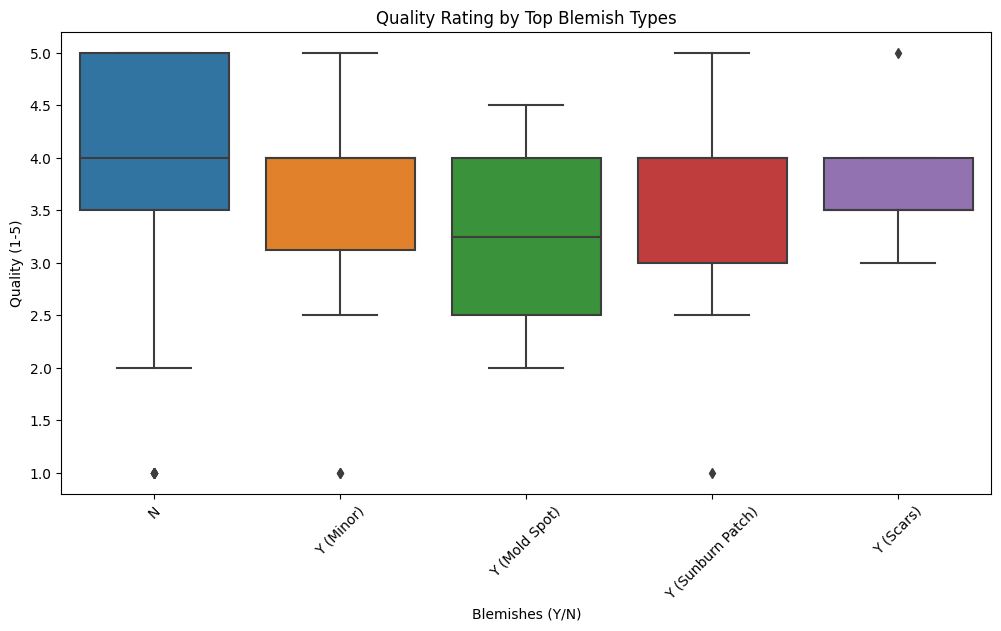

In [21]:
# Create box plots to visualize the distribution of Quality rating across top blemish types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Blemishes (Y/N)', y='Quality (1-5)', data=top_data)
plt.xticks(rotation=45)
plt.title('Quality Rating by Top Blemish Types')
plt.show()

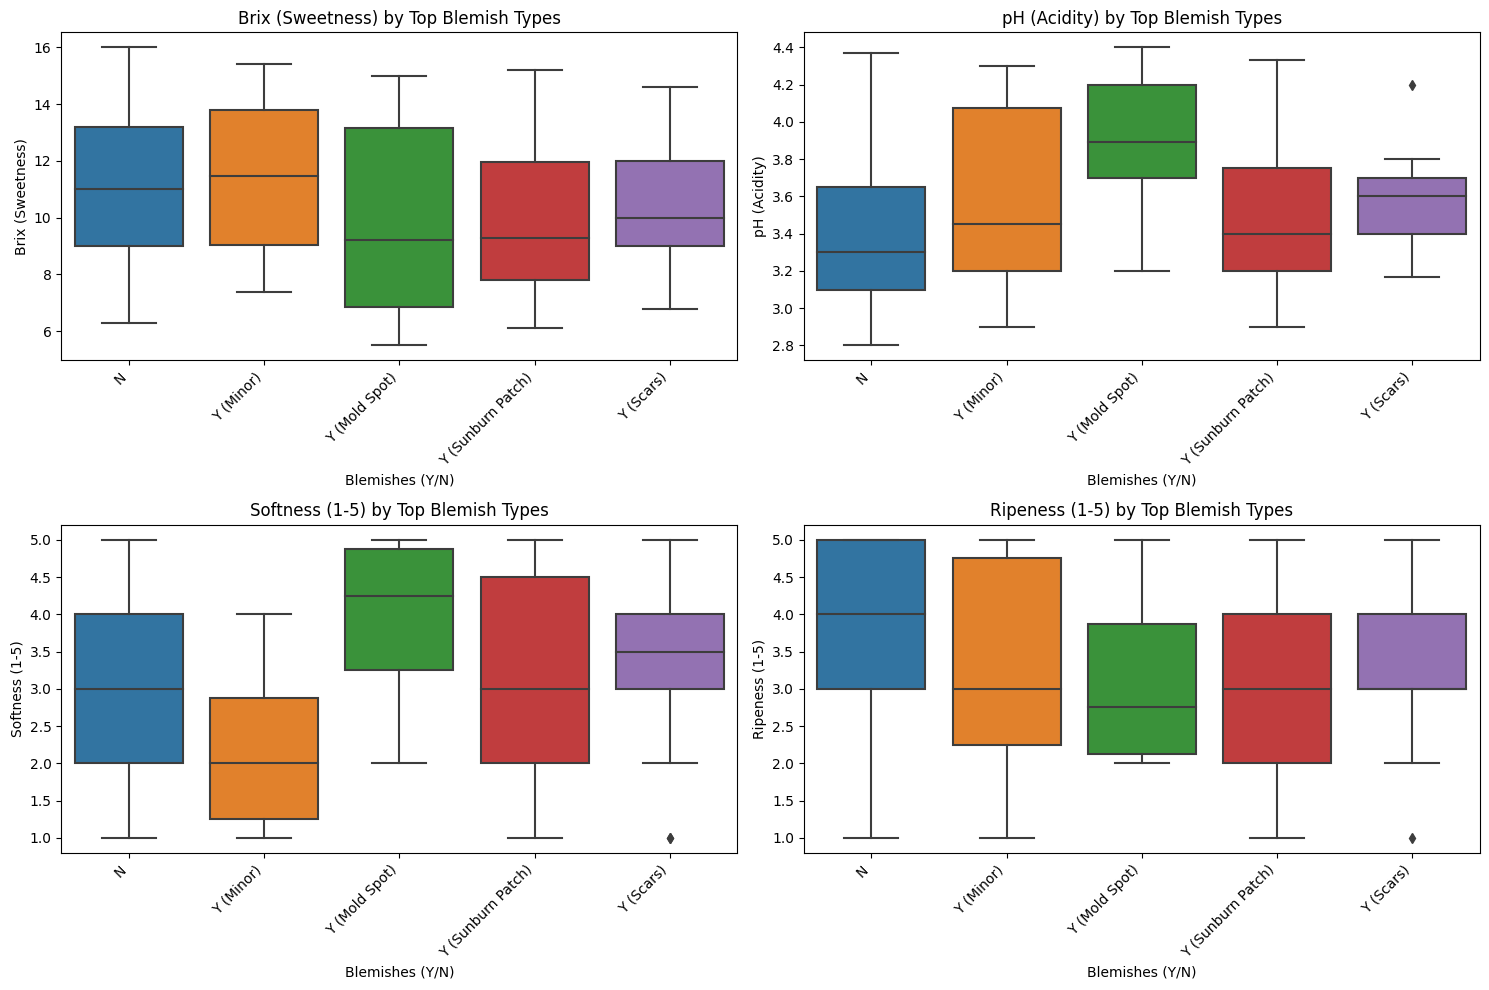

In [22]:
# Create box plots to visualize the distribution of other features across top blemish types
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)']):
    sns.boxplot(x='Blemishes (Y/N)', y=feature, data=top_data, ax=axes[i])
    axes[i].set_title(f'{feature} by Top Blemish Types')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Here are some potential insights:**

**1) Brix (Sweetness):**

* Oranges with 'Y (Minor)' blemishes have the highest mean Brix (11.36), suggesting they may be perceived as sweeter on average.

* Oranges with 'Y (Mold Spot)' blemishes have the lowest mean Brix (9.93), indicating they may be less sweet compared to other blemish types.


**2) pH (Acidity):**

* Oranges with 'Y (Mold Spot)' blemishes have the highest mean pH (3.91), suggesting they may have lower acidity levels on average.

* Oranges without blemishes ('N') have the lowest mean pH (3.38), indicating they may be slightly more acidic compared to other blemish types.

**3) Softness (1-5):**

* Oranges with 'Y (Mold Spot)' blemishes have the highest mean Softness rating (4.00), suggesting they may be perceived as softer on average.

* Oranges with 'Y (Minor)' blemishes have the lowest mean Softness rating (2.18), indicating they may be perceived as firmer compared to other blemish types.

**4) Ripeness (1-5):**

* Oranges with 'Y (Mold Spot)' blemishes have the highest mean Ripeness rating (3.15), suggesting they may be perceived as riper on average.

* Oranges with 'Y (Minor)' blemishes have the lowest mean Ripeness rating (3.36), indicating they may be perceived as less ripe compared to other blemish types.

**5) Quality (1-5):**

* Oranges without blemishes ('N') have the highest mean Quality rating (3.99), suggesting that the absence of blemishes is associated with higher perceived quality.

* Oranges with 'Y (Mold Spot)' blemishes have the lowest mean Quality rating (3.20), indicating that the presence of mold spots may significantly impact the overall quality perception.

* Oranges with 'Y (Scars)' and 'Y (Sunburn Patch)' blemishes have relatively lower mean Quality ratings (3.74 and 3.52, respectively) compared to those without blemishes.

## **Color and Ripeness Relationship**

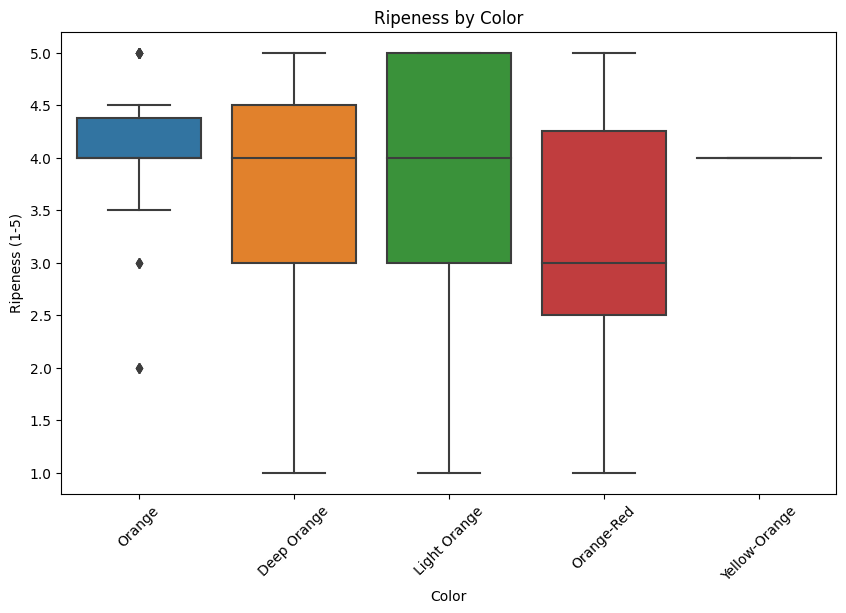

In [23]:
# Create a box plot to visualize the relationship between Color and Ripeness
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='Ripeness (1-5)', data=df)
plt.title('Ripeness by Color')
plt.xlabel('Color')
plt.ylabel('Ripeness (1-5)')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Perform a statistical test to check if the means of Ripeness are different across Color groups
from scipy.stats import f_oneway

In [25]:
color_groups = df.groupby('Color')['Ripeness (1-5)'].apply(list)
statistic, p_value = f_oneway(*color_groups)

In [26]:
print(f'One-way ANOVA test statistic: {statistic:.4f}')
print(f'One-way ANOVA p-value: {p_value:.4f}')

if p_value < 0.05:
    print('There is a significant difference in mean Ripeness across Color groups.')
else:
    print('There is no significant difference in mean Ripeness across Color groups.')

One-way ANOVA test statistic: 2.5698
One-way ANOVA p-value: 0.0387
There is a significant difference in mean Ripeness across Color groups.


In [27]:
# Calculate the mean Ripeness for each Color group
mean_ripeness_by_color = df.groupby('Color')['Ripeness (1-5)'].mean().reset_index()
print(mean_ripeness_by_color)

           Color  Ripeness (1-5)
0    Deep Orange        3.480000
1   Light Orange        3.734375
2         Orange        3.973684
3     Orange-Red        3.281818
4  Yellow-Orange        4.000000


 **Here are some insights:**

* The 'Yellow-Orange' color group has the highest mean Ripeness rating of 4.0, suggesting that oranges with a yellow-orange color tend to be perceived as the ripest on average.

* The 'Orange' color group has the second-highest mean Ripeness rating of 3.97, indicating that oranges with a pure orange color are also perceived as relatively ripe.

* The 'Light Orange' color group has a mean Ripeness rating of 3.73, which is higher than the 'Deep Orange' group (mean Ripeness of 3.48) and the 'Orange-Red' group (mean Ripeness of 3.28).

* The 'Orange-Red' color group has the lowest mean Ripeness rating of 3.28, suggesting that oranges with a reddish tint are perceived as the least ripe on average.

# ENCODING VARIABLES

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [29]:
# Encode categorical features
categorical_features = ['Color', 'Variety', 'Blemishes (Y/N)']
label_encoder = LabelEncoder()

In [30]:
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [31]:
# Separate features and target variable
X = df.drop('Quality (1-5)', axis=1)
y = df['Quality (1-5)']

In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL BUILDING 

In [33]:
# Build the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# EVALUATING MODEL

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [36]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 0.39
Root Mean Squared Error (RMSE): 0.63
R-squared (R²): 0.47


* The MSE value of 0.39 represents the average squared difference between the predicted and actual quality ratings. Since the quality ratings are on a scale of 1 to 5, an MSE of 0.39 is relatively small, indicating that the model's predictions are reasonably close to the actual values.

* Root Mean Squared Error (RMSE): The RMSE value of 0.63 is the square root of the MSE and provides an estimate of the average magnitude of the errors in the same units as the target variable (quality rating). An RMSE of 0.63 on a scale of 1 to 5 is not too large, suggesting that the model's predictions are reasonably accurate.

* R-squared (R²): The R² value of 0.47 indicates that the model can explain approximately 47% of the variance in the quality ratings based on the provided features. An R² value of 1 would represent a perfect fit, while 0 would indicate that the model is not able to explain any of the variance.

In [37]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

In [38]:
# Print the feature importances
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance:.2f}')

Size (cm): 0.03
Weight (g): 0.04
Brix (Sweetness): 0.54
pH (Acidity): 0.04
Softness (1-5): 0.15
HarvestTime (days): 0.05
Ripeness (1-5): 0.04
Color: 0.02
Variety: 0.03
Blemishes (Y/N): 0.05


* Based on these feature importances, it appears that the primary drivers of orange quality, according to the Random Forest Regression model, are the sweetness level (Brix) and the softness or texture (Softness rating). Other factors like ripeness, acidity, harvest time, and the presence of blemishes play a secondary role, while the physical characteristics like size and weight, as well as the color and variety, have a relatively minor impact on the quality prediction.